# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.buscalibre.com.co/libro-mecanica-celeste-teoria-algoritmos-y-problemas/9789585011953/p/62242977?afiliado=74c874bfb5a8145d7c1b). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-15-trescuerpos_constante_jacobi.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del problema de los tres cuerpos: Constante de Jacobi

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [1]:
!pip install -Uq pymcel

In [2]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Constante de Jacobi

Para hacernos a una idea del valor de $C_J$ podemos calcular su valor para muchos puntos alrededor de un sistema con un valor de $\alpha$ específico y asumiendo, por sencillez que la partícula se encuentra en reposo en esos puntos.  Con ese propósito construyamos primero una *malla* de puntos (matriz de pares) en un plano paralelo al plano $x-y$:

In [8]:
#Valor de z en el que se encuentra el plano
zplano=0.0

#Tamaño de la malla y número de filas y columnas
rango=1.5
NG=80

#Malla de puntos
from numpy import meshgrid,linspace,ones_like
X,Y=meshgrid(linspace(-rango,rango,NG),linspace(-rango,rango,NG))
Z=zplano*ones_like(X)

Con las matrices de las coordenadas de la malla podemos proceder a calcular los valores de la constante de Jacobi correspondiente a un determinado valor (fijo) de la rapidez:

In [12]:
#Parámetro del sistema
alfa=0.3

#Rapidez de la partícula de prueba
v=0.0

#Valor de CJ
from numpy import sqrt
CJ=2*(1-alfa)/sqrt((X+alfa)**2+Y**2+Z**2)+\
   2*alfa/sqrt((X-1+alfa)**2+Y**2+Z**2)+\
   (X**2+Y**2)-\
   v**2

from numpy import set_printoptions
set_printoptions(precision=3,suppress=True,threshold=3)
print(f"Constante de Jacobi en la malla:\n{CJ}")

Constante de Jacobi en la malla:
[[5.454 5.353 5.256 ... 5.251 5.349 5.45 ]
 [5.355 5.255 5.157 ... 5.153 5.25  5.351]
 [5.259 5.159 5.062 ... 5.057 5.155 5.255]
 ...
 [5.259 5.159 5.062 ... 5.057 5.155 5.255]
 [5.355 5.255 5.157 ... 5.153 5.25  5.351]
 [5.454 5.353 5.256 ... 5.251 5.349 5.45 ]]


Podemos representar gráficamente este resultado, construyendo a partir de estas matrices, contornos numéricos (líneas de igual valor de $C_J$) que nos permiten, nuevamente, ganar un poco de intuición sobre esta importante cantidad.  El algoritmo a continuación lleva a cabo ese cometido:


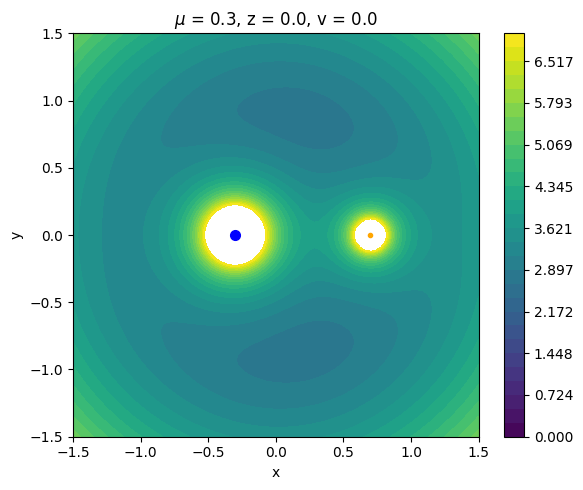

In [16]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,5))
ax=fig.gca()

#Curva de cero velocidad
from numpy import linspace
c=ax.contourf(X,Y,CJ,levels=linspace(0,7,30))
plt.colorbar(c)
ax.plot([-alfa],[0],'o',color='blue',markersize=10*(1-alfa))
ax.plot([1-alfa],[0],'o',color='orange',markersize=max(2,10*alfa))

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(f"$\mu$ = {alfa:.2}, z = {zplano}, v = {v}")
ax.set_xlim((-rango,rango))
ax.set_ylim((-rango,rango))
fig.tight_layout()

El siguiente algoritmo permite explorar el valor de la constante $C_J$ en el espacio alrededor de las partículas en el CRTBP, cambiando los valores de algunas de las variables críticas del problema.

In [17]:
def mapa_constante_Jacobi(alfa=0.3,zplano=0,v=0):
    #Valor de z en el que se encuentra el plano
    zplano=float(zplano)
    alfa=float(alfa)
    v=float(v)

    #Tamaño de la malla y número de filas y columnas
    rango=1+alfa
    NG=80

    #Malla de puntos
    from numpy import meshgrid,linspace,ones_like
    X,Y=meshgrid(linspace(-rango,rango,NG),linspace(-rango,rango,NG))
    Z=zplano*ones_like(X)
    
    #Valor de CJ
    from numpy import sqrt
    CJ=2*(1-alfa)/sqrt((X+alfa)**2+Y**2+Z**2)+\
       2*alfa/sqrt((X-1+alfa)**2+Y**2+Z**2)+\
       (X**2+Y**2)-\
       v**2

    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(6,5))
    ax=fig.gca()

    #Curva de cero velocidad
    from numpy import linspace
    c=ax.contourf(X,Y,CJ,levels=linspace(0,5,10))
    plt.colorbar(c)
    ax.plot([-alfa],[0],'o',color='blue',markersize=10*(1-alfa))
    ax.plot([1-alfa],[0],'o',color='orange',markersize=max(2,10*alfa))

    ax.set_xlabel("x")
    ax.set_xlabel("y")
    ax.set_title(f"z = {zplano}, v = {v}")
    ax.set_xlim((-rango,rango))
    ax.set_ylim((-rango,rango))
    fig.tight_layout()    
    
# Widgets de Jupyter
from ipywidgets import interact,fixed,widgets
opciones=dict(continuous_update=False)

# Código de interacción
interact(mapa_constante_Jacobi,
         alfa=widgets.FloatSlider(min=0.01,max=0.5,step=0.02,value=0.3,**opciones),
         zplano=widgets.FloatSlider(min=-1,max=1,step=0.1,value=0.0,**opciones),
         v=widgets.FloatSlider(min=0,max=2,step=0.1,value=0.0,**opciones)
        );

interactive(children=(FloatSlider(value=0.3, continuous_update=False, description='alfa', max=0.5, min=0.01, s…

### Cuadratura de Jacobi de un sistema simulado

Preparemos ahora un sistema simulado:

In [19]:
#Propiedades del sistema y condiciones iniciales
alfa=0.3
ro=[1.0,0.0,0.0]
vo=[0.0,0.45,0.0]
#Tiempos de integración
from numpy import linspace
Nt=1000
ts=linspace(0,10,Nt)
#Resuelve numéricamente la ecuación de movimiento
from pymcel.export import crtbp_solucion
solucion=crtbp_solucion(alfa,ro,vo,ts)
#Extrae las posiciones y velocidades en el sistema rotante
rs=solucion[0]
vs=solucion[1]

Podemos ahora calcular el valor de la constante de Jacobi para cada uno de los puntos de la trayectoria de la partícula.  Para ello, escribamos una rutina general que permita calcular la constante para el conjunto de valores de la posición y la velocidad de la partícula de prueba:

In [20]:
def constante_jacobi(alfa,r,vel):
    from numpy import array
    r=array(r)
    vel=array(vel)
    
    #Valor de x, y, z
    x=r[:,0]
    y=r[:,1]
    z=r[:,2]
    
    #Rapidez
    from numpy.linalg import norm
    v=norm(vel,axis=1)
    
    #Posiciones relativas
    from numpy import sqrt
    r1=sqrt((x+alfa)**2+y**2+z**2)
    r2=sqrt((x-1+alfa)**2+y**2+z**2)
    
    #Valor de la constante
    CJ=2*(1-alfa)/r1+2*alfa/r2+(x**2+y**2)-v**2
    return CJ

Ahora aplicamos la rutina para calculas los valores obtenidos con la solución numérica de las ecuaciones de movimiento:

In [21]:
CJ=constante_jacobi(alfa,rs,vs)

from numpy import set_printoptions
set_printoptions(precision=5,suppress=True,threshold=3)
print(f"Constante de Jacobi para sistema real:\n{CJ}")

Constante de Jacobi para sistema real:
[3.87442 3.87442 3.87442 ... 3.87443 3.87443 3.87443]


### Cuadratura de Jacobi de un sistema real

Consideremos el siguiente sistema:

In [22]:
sistema=[
    dict(
        m=1e-3,
        r=[0.5,0.0,0.5],
        v=[0,0.5,0],
    ),
    dict(
        m=3.0,
        r=[0,0,0],
        v=[0,0,0]),
    dict(
        m=1.0,
        r=[1.0,0,0],
        v=[0,2.0,0],
    ),
]

Resolvamos numéricamente las ecuaciones de movimiento correspondientes:

In [23]:
from numpy import linspace
Nt=1000
ts=linspace(0,10,Nt)

from pymcel.export import ncuerpos_solucion
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

Ahora veamos una gráfica de las trayectorias en el sistema de referencia del centro de masa (sistema de referencia inercial):

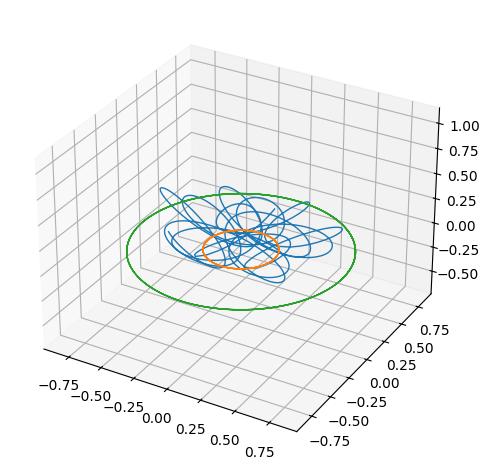

In [24]:
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rps,vps);

Calculemos la trayectoria en el sistema rotante calculando primero la velocidad angular promedio:

In [26]:
#Distancia entre las partículas 1 y 2
from numpy.linalg import norm
r12=norm(rps[1]-rps[2],axis=1)
#Promedio
a=r12.mean()
print(f"a (distancia media entre partículas masivas) = {a}")

from numpy import sqrt
m1=sistema[1]["m"]
m2=sistema[2]["m"]
n=sqrt((m1+m2)/a**3)
print(f"n (velocidad orbital angular media de las partículas masivas) = {n}")


a (distancia media entre partículas masivas) = 0.9993091827791326
n (velocidad orbital angular media de las partículas masivas) = 2.002074242712686


Rotemos ahora todas las posiciones y velocidades de las partículas 

In [27]:
#Velocidad angular
w=n
from numpy import array
omega=array([0,0,w])

#Vectores en el sistema rotado
from numpy import zeros_like
rps_rot=zeros_like(rps)
vps_rot=zeros_like(vps)
for i in range(Nt):

    #Matriz de rotación
    from spiceypy import rotate,mxv
    R=rotate(w*ts[i],3)

    #Rota las posiciones y velocidades de cada partícula
    for n in range(3):
        rps_rot[n,i]=mxv(R,rps[n,i])
        #v' = v + w x r
        from spiceypy import vcrss
        vps_rot[n,i]=mxv(R,vps[n,i]-vcrss(omega,rps[n,i]))

Veamos como se ve la dinámica en el sistema rotante después de esta transformación:

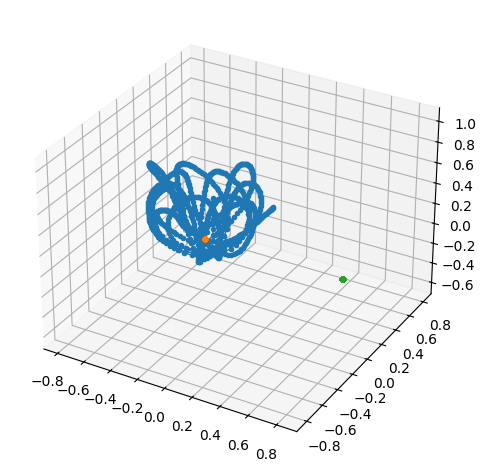

In [28]:
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rps_rot,vps_rot,marker='o',ms=3);

La prueba de fuego de nuestra teoría consiste en averiguar si incluso en un sistema que no satisface estrictamente las condiciones del CRTBP (la partícula de prueba tiene una masa distinta de cero, la órbita de las partículas masivas no es exactamente circular debido a la perturbación de la partícula), la cuadratura de Jacobi sigue siendo aproximadamente constante. Para ello calculemos el valor de  CJ
  en este sistema

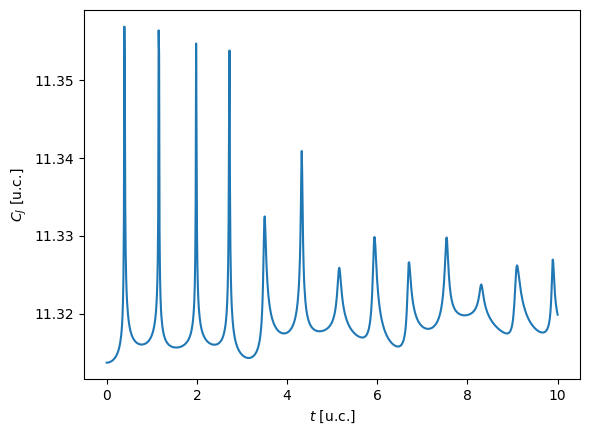

In [29]:
#Posiciones de la partícula de prueba
r=rps_rot[0]

#Posiciones y velocidades relativas a las partículas masivas
from numpy.linalg import norm
r1=norm(rps_rot[0]-rps_rot[1],axis=1)
r2=norm(rps_rot[0]-rps_rot[2],axis=1)

#Rapideces
v=norm(vps_rot[0],axis=1)

#Parametros gravitacionales
mu1=m1
mu2=m2

#Cuadratura de Jacobi
CJ=2*mu1/r1+2*mu2/r2+w**2*(r[:,0]**2+r[:,1]**2)-v**2

fig=plt.figure()
ax=fig.gca()
ax.plot(ts,CJ)
ax.set_xlabel("$t$ [u.c.]");
ax.set_ylabel("$C_J$ [u.c.]");

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)